In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Define Activate Functions

### Sigmoid

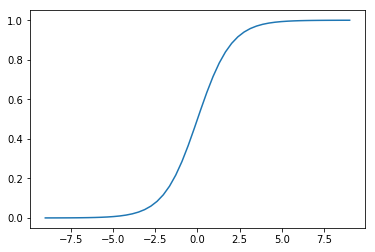

In [16]:
def sigmoid(n):
    return 1 / (1 + np.exp(-n))

xx = np.linspace(start=-9, stop=+9)
yy = sigmoid(xx)

plt.plot(xx, yy)

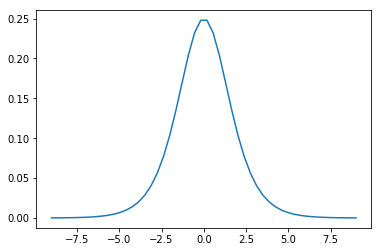

In [20]:
def sigmoid_derivative(n):
    return sigmoid(n) * (1 - sigmoid(n))

xx = np.linspace(start=-9, stop=+9)
yy = sigmoid_derivative(xx)

plt.plot(xx, yy)

### ReLU

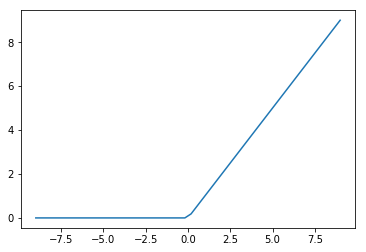

In [19]:
def relu(n):
    return n * (n > 0)

xx = np.linspace(start=-9, stop=+9)
yy = relu(xx)

plt.plot(xx, yy)

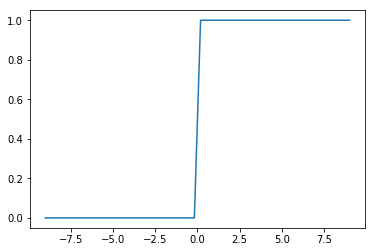

In [15]:
def relu_derivative(n):
    return 1 * (n > 0)

xx = np.linspace(start=-9, stop=+9)
yy = relu_derivative(xx)

plt.plot(xx, yy)

In [21]:
%time tmp = [sigmoid(i) for i in range(1000000)]
%time tmp = [sigmoid_derivative(i) for i in range(1000000)]

CPU times: user 1.34 s, sys: 4 ms, total: 1.35 s
Wall time: 1.35 s
CPU times: user 2.99 s, sys: 4 ms, total: 2.99 s
Wall time: 2.99 s


In [22]:
%time tmp = [relu(i) for i in range(1000000)]
%time tmp = [relu_derivative(i) for i in range(1000000)]

CPU times: user 108 ms, sys: 4 ms, total: 112 ms
Wall time: 114 ms
CPU times: user 104 ms, sys: 8 ms, total: 112 ms
Wall time: 110 ms


## Load Dataset

In [9]:
from keras.datasets import mnist

((X_train, y_train), (X_test, y_test)) = mnist.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

Using TensorFlow backend.


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


## Preprocessing

In [10]:
X_train = X_train.reshape(60000, 28 * 28)
X_test = X_test.reshape(10000, 28 * 28)

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [11]:
from keras.utils import to_categorical

y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)

print(y_train_hot.shape, y_test_hot.shape)

(60000, 10) (10000, 10)


## Train

### Sigmoid

In [12]:
# num_epoch = 10
num_epoch = 100
learning_rate = 0.000001

w1 = np.random.uniform(low=-np.sqrt(6 / (784 + 1000)), high=np.sqrt(6 / (784 + 1000)), size=(784, 1000))
w2 = np.random.uniform(low=-np.sqrt(6 / (1000 + 1000)), high=np.sqrt(6 / (1000 + 1000)), size=(1000, 1000))
w3 = np.random.uniform(low=-np.sqrt(6 / (1000 + 10)), high=np.sqrt(6 / (1000 + 10)), size=(1000, 10))

import time

start = time.time()

sigmoid_epoch_list = []

for epoch in range(num_epoch):
    z1 = X_train.dot(w1)
    a1 = sigmoid(z1)
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)
    z3 = a2.dot(w3)
    a3 = sigmoid(z3)

    y_predict = np.argmax(a3, axis=1)    
    error = (y_train != y_predict).mean()
    
    if epoch % 10 == 0:
        print("{0:2} error = {1:.5f}".format(epoch, error))
    
    end = time.time()
    sigmoid_epoch_list.append({
        'epoch': end - start,
        'error': error
    })

    d3 = a3 - y_train_hot
    d2 = d3.dot(w3.T) * sigmoid_derivative(a2)
    d1 = d2.dot(w2.T) * sigmoid_derivative(a1)
    
    w3 = w3 - learning_rate * a2.T.dot(d3)
    w2 = w2 - learning_rate * a1.T.dot(d2)
    w1 = w1 - learning_rate * X_train.T.dot(d1)

print("----" * 10)
print("{0:2} error = {1:.5f}".format(epoch, error))

end = time.time()
print(end - start)

 0 error = 0.85685


/home/dsschool/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


10 error = 0.22488
20 error = 0.19785
30 error = 0.18368
40 error = 0.17413
50 error = 0.16553
60 error = 0.15930
70 error = 0.15423
80 error = 0.15053
90 error = 0.14738
----------------------------------------
99 error = 0.14455
957.136435508728


### ReLU

In [13]:
# num_epoch = 10
num_epoch = 100
learning_rate = 0.00000001

w1 = np.random.randn(784, 1000) * np.sqrt(2.0 / 784)
w2 = np.random.randn(1000, 1000) * np.sqrt(2.0 / 1000)
w3 = np.random.randn(1000, 10) * np.sqrt(2.0 / 1000)

start = time.time()

relu_epoch_list = []

for epoch in range(num_epoch):
    z1 = X_train.dot(w1)
    a1 = relu(z1)
    z2 = a1.dot(w2)
    a2 = relu(z2)
    z3 = a2.dot(w3)
    a3 = sigmoid(z3)

    y_predict = np.argmax(a3, axis=1)    
    error = (y_train != y_predict).mean()

    if epoch % 10 == 0:
        print("{0:2} error = {1:.5f}".format(epoch, error))

    end = time.time()
    relu_epoch_list.append({
        'time': end - start,
        'error': error
    })

    d3 = a3 - y_train_hot
    d2 = d3.dot(w3.T) * relu_derivative(a2)
    d1 = d2.dot(w2.T) * relu_derivative(a1)

    w3 = w3 - learning_rate * a2.T.dot(d3)
    w2 = w2 - learning_rate * a1.T.dot(d2)
    w1 = w1 - learning_rate * X_train.T.dot(d1)

print("----" * 10)
print("{0:2} error = {1:.5f}".format(epoch, error))

print(end - start)

 0 error = 0.88098


/home/dsschool/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


10 error = 0.34810
20 error = 0.24212
30 error = 0.19692
40 error = 0.17155
50 error = 0.15487
60 error = 0.14278
70 error = 0.13420
80 error = 0.12752
90 error = 0.12163
----------------------------------------
99 error = 0.11688
439.38131952285767


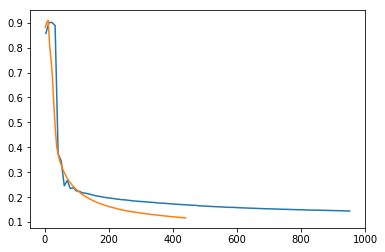

In [14]:
%matplotlib inline
import pandas as pd

sigmoid_epoch_list = pd.DataFrame(sigmoid_epoch_list)
relu_epoch_list = pd.DataFrame(relu_epoch_list)

plt.plot(sigmoid_epoch_list["epoch"], sigmoid_epoch_list["error"], label="sigmoid")
plt.plot(relu_epoch_list["time"], relu_epoch_list["error"], label="relu")